# Computer Vision

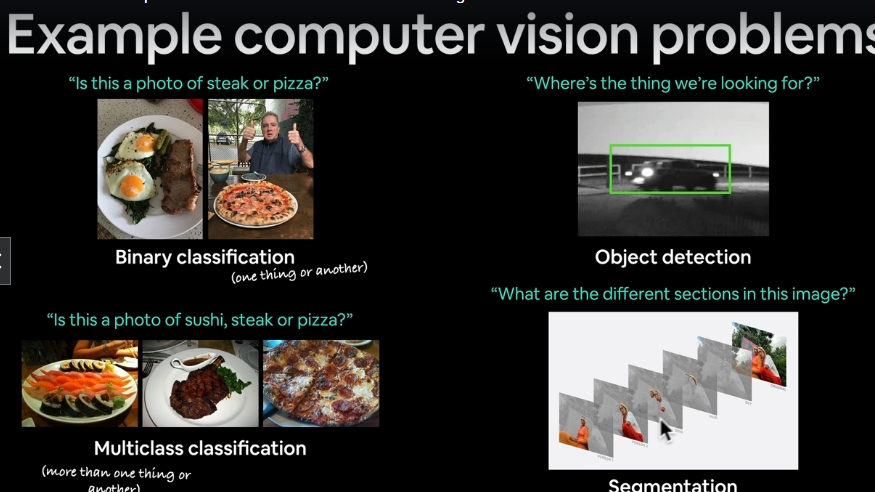

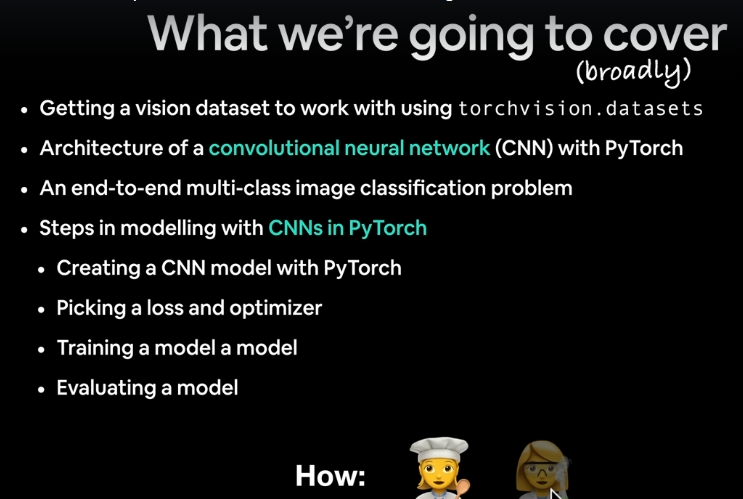